First 5 Rows:
         Date  Gross_Sales  Net_Sales  COGS  Manufacturing_Cost  Freight_Cost
0  2023-01-01         1200       1000   350                 250           120
1  2023-01-02         1225       1022   356                 255           123
2  2023-01-03         1250       1044   362                 260           126
3  2023-01-04         1275       1066   368                 265           129
4  2023-01-05         1300       1088   374                 270           132

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                25 non-null     object
 1   Gross_Sales         25 non-null     int64 
 2   Net_Sales           25 non-null     int64 
 3   COGS                25 non-null     int64 
 4   Manufacturing_Cost  25 non-null     int64 
 5   Freight_Cost        25 non-null     int64 
dtypes: int64(5),

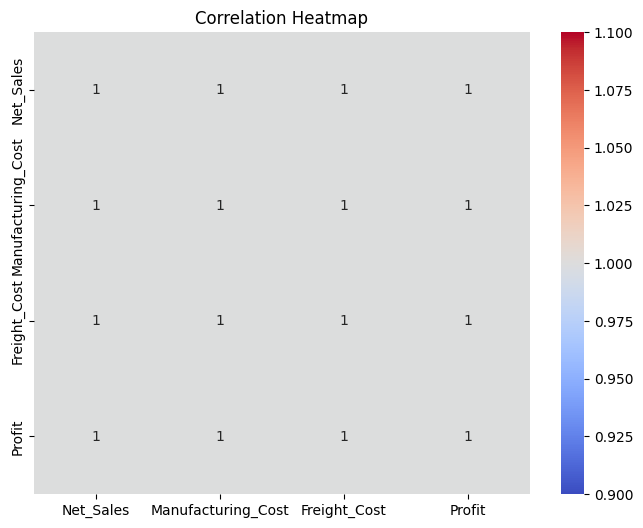

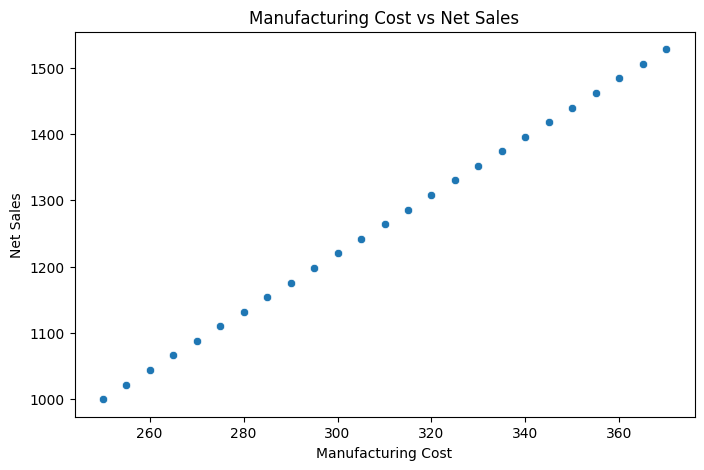

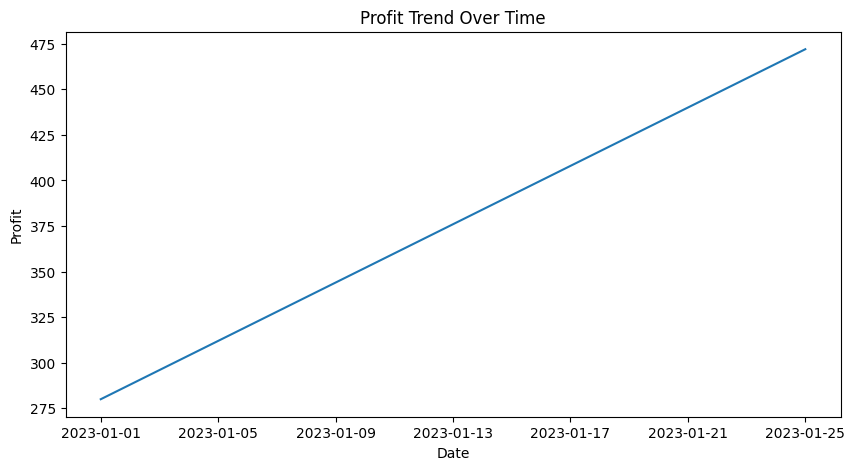

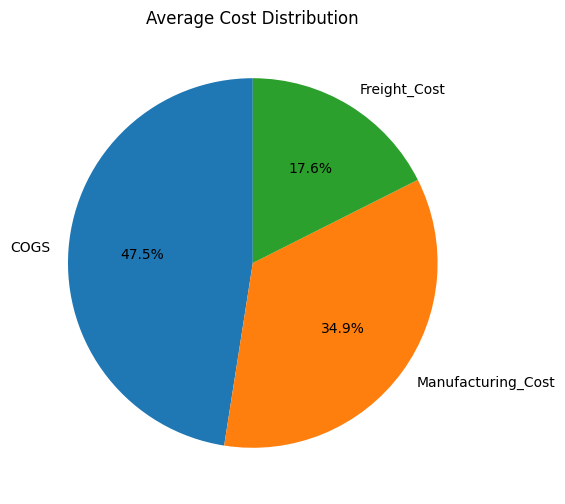


Key Insights:
- Manufacturing cost has a noticeable impact on net sales.
- Profit shows fluctuations over time indicating seasonality.
- Cost of Goods Sold (COGS) is the largest expense contributor.

Conclusion:
This sales data analysis highlights the importance of managing
manufacturing and freight costs to improve profitability.
Visual trends reveal seasonal profit variations, which can help
businesses plan better pricing and cost strategies.



In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Load Dataset
df = pd.read_csv("sales_data.csv")

# 3. Initial Exploration
print("First 5 Rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df['Profit'] = df['Net_Sales'] - (
    df['COGS'] + df['Manufacturing_Cost'] + df['Freight_Cost']
)

print("\nResearch Questions:")
print("1. How do manufacturing costs affect net sales?")
print("2. What is the profit trend over time?")
print("3. Which cost component impacts profitability the most?")

plt.figure(figsize=(8,6))
sns.heatmap(
    df[['Net_Sales', 'Manufacturing_Cost', 'Freight_Cost', 'Profit']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(
    x='Manufacturing_Cost',
    y='Net_Sales',
    data=df
)
plt.title("Manufacturing Cost vs Net Sales")
plt.xlabel("Manufacturing Cost")
plt.ylabel("Net Sales")
plt.show()

plt.figure(figsize=(10,5))
sns.lineplot(
    x='Date',
    y='Profit',
    data=df
)
plt.title("Profit Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Profit")
plt.show()

avg_costs = df[['COGS', 'Manufacturing_Cost', 'Freight_Cost']].mean()

plt.figure(figsize=(6,6))
avg_costs.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Average Cost Distribution")
plt.ylabel("")
plt.show()

print("\nKey Insights:")
print("- Manufacturing cost has a noticeable impact on net sales.")
print("- Profit shows fluctuations over time indicating seasonality.")
print("- Cost of Goods Sold (COGS) is the largest expense contributor.")

#Conclusion
print("""
Conclusion:
This sales data analysis highlights the importance of managing
manufacturing and freight costs to improve profitability.
Visual trends reveal seasonal profit variations, which can help
businesses plan better pricing and cost strategies.
""")
